## Enter XRD input file names here

In [15]:
#import the necessary packages for data uploading and processing
import os
import numpy as np
cwd = os.getcwd() #This allows you to find files in the same directory as the .ipynb file
print(cwd)
#unmodified Topas export (i.e. two header rows and commas separating the values)
dataFiles = ['CLR_4N_051D_example1.txt',
            'CLR_4N_056A_example2.txt']
    
#load in XRD fit data from Topas export
dictionary = {}
for f in dataFiles:
    filePath = os.path.join(cwd,f)
    key = f[0:11] #makes the key the beginning of the file name (i.e. my sample names CLR_4N_123A)
    dictionary[key] = np.loadtxt(filePath, delimiter=',', dtype = 'float', skiprows = 2, unpack=True)
    
    #Here's your data
    print(key)
    print(dictionary[key])
    print()

/Users/chris/OneDrive - Colostate/GitHub/XRD Plotting
CLR_4N_051D
[[  35.0001       35.030705     35.0613101  ...   54.9239781
    54.9545831    54.9851881 ]
 [1706.         1688.         1657.         ...  774.
   758.          733.        ]
 [  46.9865984    27.829909     -4.48941178 ...   40.3853485
    18.9693412   -16.0840966 ]
 [1659.0134     1660.17009    1661.48941    ...  733.614651
   739.030659    749.084097  ]]

CLR_4N_056A
[[ 1.00001000e+01  1.00358618e+01  1.00716236e+01 ...  5.99235789e+01
   5.99593407e+01  5.99951026e+01]
 [ 3.30600000e+03  3.40200000e+03  3.25600000e+03 ...  4.05000000e+02
   3.84000000e+02  3.88000000e+02]
 [-3.58555249e+02 -2.37703381e+02 -3.59908639e+02 ...  1.79789383e+00
  -1.91501675e+01 -1.51493234e+01]
 [ 3.66455525e+03  3.63970338e+03  3.61590864e+03 ...  4.03202106e+02
   4.03150167e+02  4.03149323e+02]]



## Enter calculated patterns here

In [50]:
#import the .xy file(s) of the calculated pattern

#Where are the files stored? 
vestaStr = '/Users/chris/OneDrive - Colostate/GitHub/XRD Plotting'
#list for holding hkl file names 
calcFiles = []
#use hkl append to add as many as needed
calcNames = []

calcFiles.append('CuKa_CalcPattern_example1.xy') #copy and paste the file name here
calcNames.append('M') #this name will be displayed in the plot as a label

calcFiles.append('CuKa_CalcPattern_example2.xy')
calcNames.append('MX$_2$')

calcData = []
for file in calcFiles:
    calcPath = os.path.join(vestaStr,file)
    calcData.append(np.loadtxt(calcPath, dtype = 'float', unpack=True))
print(calcData)

[array([[1.0000e+00, 1.0100e+00, 1.0200e+00, ..., 1.1997e+02, 1.1998e+02,
        1.1999e+02],
       [0.0000e+00, 1.2598e-01, 1.2359e-01, ..., 3.1600e-03, 3.1500e-03,
        3.1400e-03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]]), array([[1.0000e+00, 1.0100e+00, 1.0200e+00, ..., 1.1997e+02, 1.1998e+02,
        1.1999e+02],
       [0.0000e+00, 1.8294e-01, 1.7947e-01, ..., 9.2500e-03, 9.1300e-03,
        9.0100e-03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])]


## Import plotting packages and adjust formatting here

In [65]:
#import the 
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from matplotlib import gridspec
from pylab import * #imports matplotlib (and ???)

#The following 4 lines fail for some reason and I can't figure out why
# matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':"sans-serif"})
matplotlib.rc('text.latex',preamble=r'\usepackage{sfmath}')
# import matplotlib.patches as patches

allSized = 18 #Whatever you want all the text size to be. 
matplotlib.rc('font',   size=     allSized,**{'family':"sans-serif"})     # controls default text sizes
matplotlib.rc('axes',   titlesize=allSized)     # fontsize of the axes title
matplotlib.rc('axes',   labelsize=allSized)    # fontsize of the x and y labels
matplotlib.rc('xtick',  labelsize=allSized)    # fontsize of the tick labels
matplotlib.rc('ytick',  labelsize=allSized)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize= allSized)    # legend fontsize
matplotlib.rc('figure', titlesize=allSized)  # fontsize of the figure title

# # Say, "the default sans-serif font is Helvetica"
# matplotlib.rcParams['font.sans-serif'] = "Helvetica"
# # Then, "ALWAYS use sans-serif fonts"
# matplotlib.rcParams['font.family'] = "sans-serif"

## Plot the XRD data and the calculated patterns here

<IPython.core.display.Javascript object>


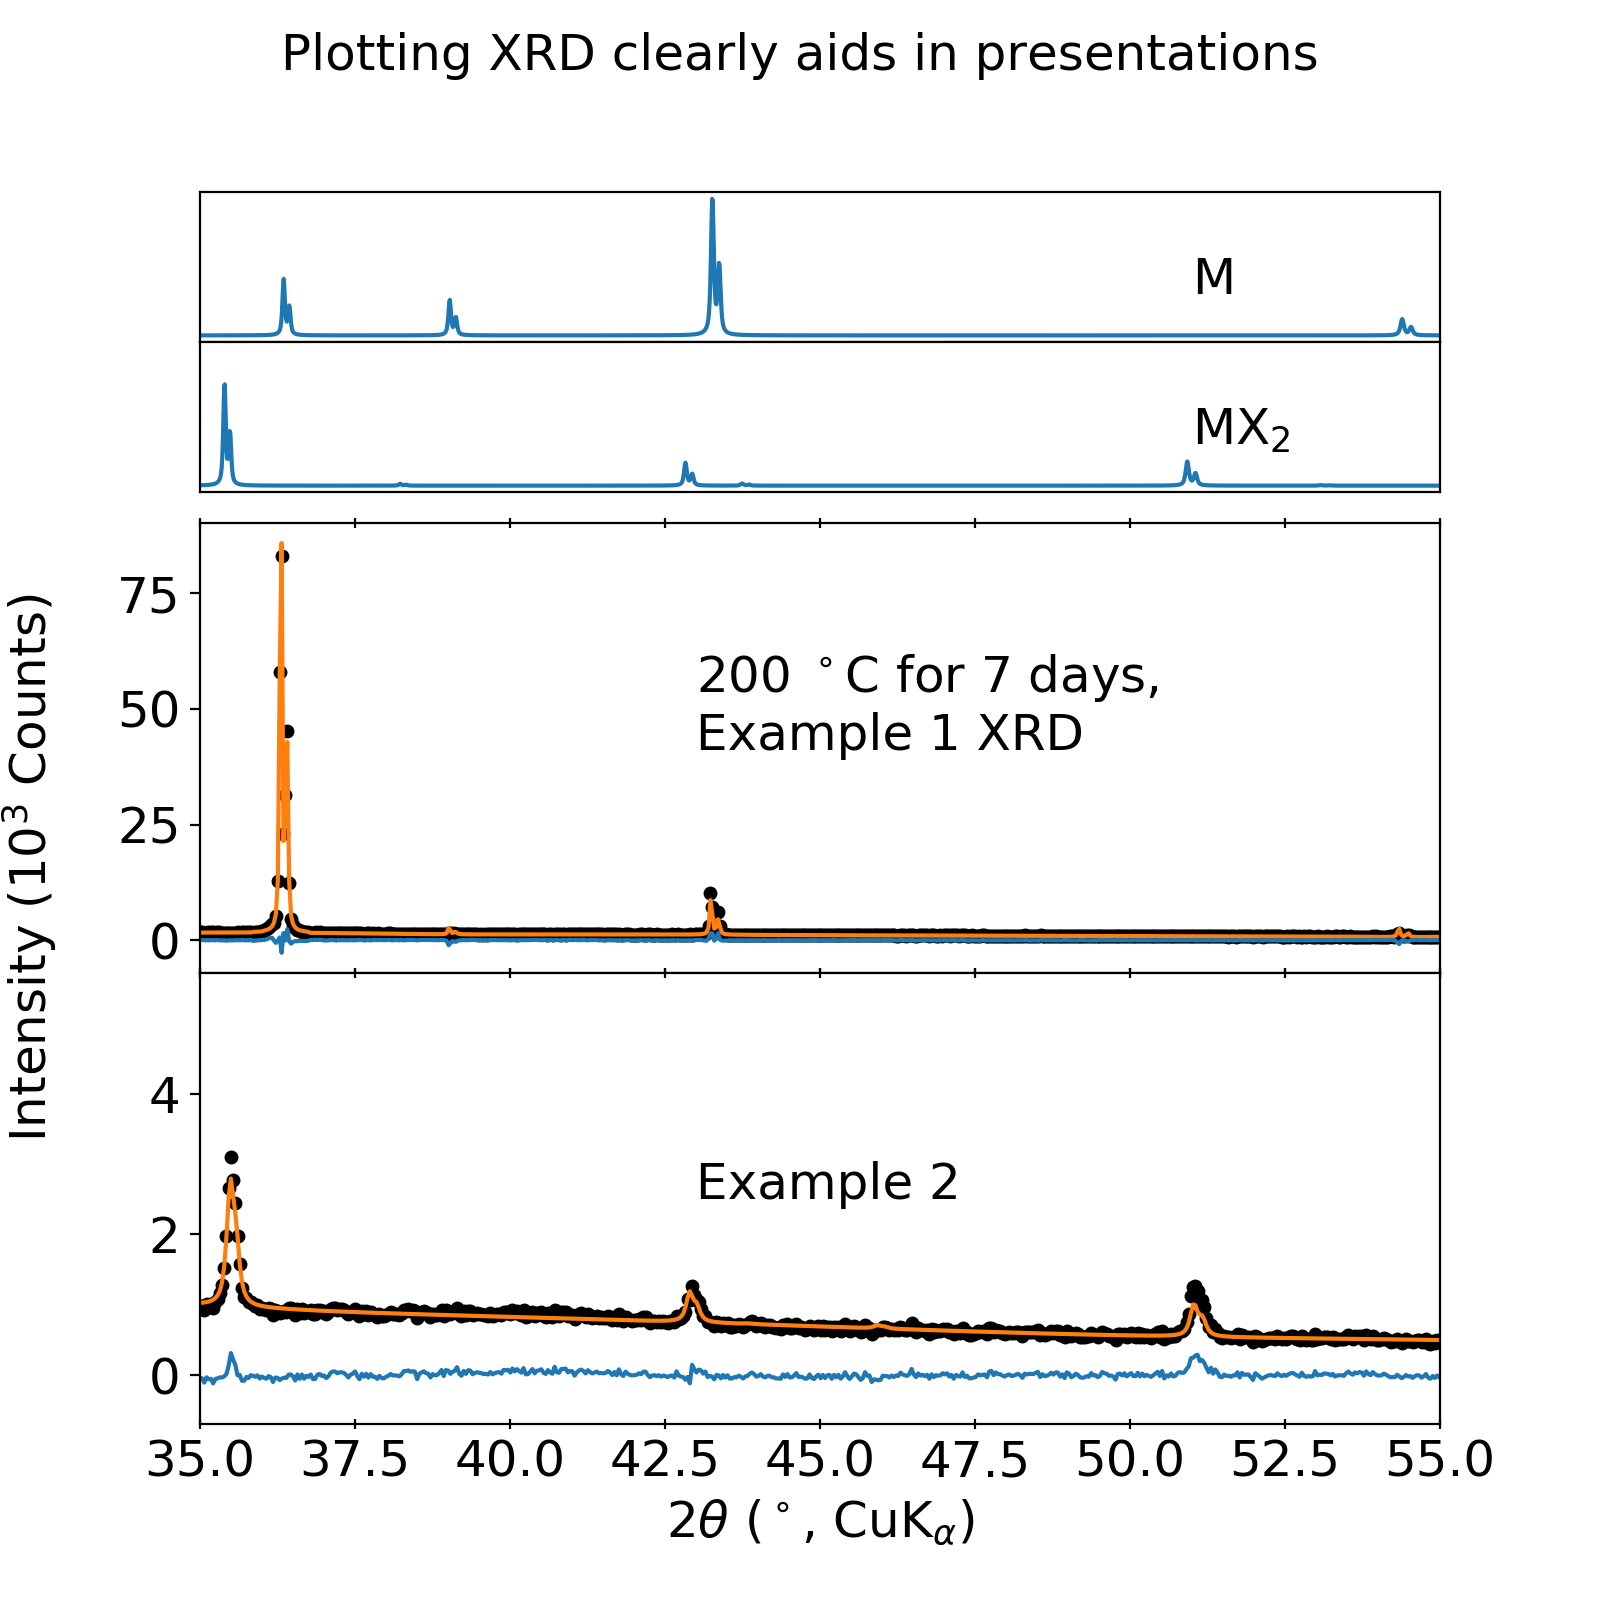

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [67]:
fig = plt.figure(figsize=(8, 8)) #Square figures are the best figures
#See the following for more on making figures: http://www.mrl.ucsb.edu/~seshadri/PreparingFigures.pdf

#This establishes the two sections (calculated patterns on top, experimental XRD on the bottom)
#adjust the height ratios depending on the number of phases & datasets
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3]) 
gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 


#Set the x-axis focus two theta range
xmin = 35
xmax = 55
#these need to be specified so that the peaks line up vertically

#Set the y-axis range
# ymin = -1.5
# ymax = 9.5
#If you would prefer not to specify the y-axis range, comment out these lines
#you may need to restart the kernel

#The following values can be used to tweak the aesthetics of the data
scale = 1000
diffOff = 0  # used to offset the difference curve


#OPTIONAL Modifications
dataColor = 'k' #black
fitColor = 'tab:orange'
diffColor = 'tab:blue'


#This makes grid within the larger grid, in order to separate calculated patterns
inner_grid = gridspec.GridSpecFromSubplotSpec(len(calcData), 1,
                subplot_spec=gs[0], hspace = 0, wspace=0.0) #, hspace=1)

###calculated patterns, top box
for x in range(len(calcData)):
    c = calcData[x]
    ax0 = plt.subplot(inner_grid[x]) #make a subplot on row "i" in the inner grid
    ax0.plot(c[0], c[1])
    #Turn off all gridlines, tick labels.
    ax0.set_xticklabels([])
    ax0.tick_params(axis = 'x', direction = 'in', top = False, bottom = False)
    ax0.tick_params(axis = 'y', left = False, right = False, labelleft = False, labelright = False)
    #Label each pattern.  In this case, the y min is approx. -5, ymax is approx. 110
    ax0.text(0.8*(xmax-xmin)+xmin, 30, calcNames[x]) #Label each pattern
    ax0.set_xlim(xmin, xmax) # Make sure axes match. 

#Makes a grid within the larger grid, useful for putting each experimental XRD into a subplot
inner_grid2 = gridspec.GridSpecFromSubplotSpec(len(dictionary), 1,
                subplot_spec=gs[1], wspace=0.0, hspace=0)

#I often use labels to describe conditions unique to each scan.
labels = ['200 $^\circ$C for 7 days,\nExample 1 XRD',
         'Example 2']
#alternatively, one could just use the keys from the dictionary

### Experimental XRD patterns, bottom box
i = 0 #to iterate through inner grid components
for key in dictionary:
    ax1 = plt.subplot(inner_grid2[i])
    d = dictionary[key]
    t = d[0]
    data = d[1]
    fit = d[3]
    diff = d[2]
    ax1.plot(t,data/scale, color = dataColor, marker = 'o', lineStyle ='None', label = key, markersize = 4)
    ax1.plot(t,fit/scale, color = fitColor)#, label = 'Fit')
    ax1.plot(t,diff/scale, color = diffColor)#, label = 'Difference')
    ax1.tick_params(axis = 'x', 
                    direction = 'inout',
                   bottom = True, top = True)
    
    if(ymin>0): #for the sake of labeling, if the ymin and ymax have not been specified
        print ('Lower y limit is ' + str(ymin))
    else:
        ymin , ymax = ax1.get_ylim()
    #label each box
    ax1.text(0.4*(xmax-xmin)+xmin, #to set the label location relative to the axis values
             0.5*(ymax-ymin)+ymin, 
             labels[i])

#ax1.set_ylim(ymin, ymax) #comment this out if you don't want to specify the heights

    if i == len(dataFiles)-1:
        ax1.set_xlabel('$2\\theta$ ($^\circ$, CuK$_{\\alpha}$)')
    else:
        ax1.set_xticklabels([])
    ax1.set_xlim(xmin, xmax)
    i +=1

fig.text(-0.0, 0.6, s = 'Intensity (10$^3$ Counts)', rotation = 'vertical')


# #difference curve, bottom box
# ax2 = plt.subplot(gs[2])
# ax2.set_xlim(xmin, xmax)
# ax2.plot(t,diff, 'navy', label = "Difference")
# ax2.set_xlabel('$2\Theta$ ($^\circ$, Cu$_{k\\alpha}$)')
# ax2.tick_params(direction = 'in', top = True, bottom = True, right = True)
# ax2.legend(loc = legLoc, frameon = False)

#Outputs a title that can easily be cropped out in powerpoint/keynote,
#using a file name can help ensure one doesn't mismatch data accidentally
fig.suptitle('Plotting XRD clearly aids in presentations')
plt.tight_layout()
# plt.show()

## Run the code below to save the figure

In [60]:
#Save the figure
#In the code above, comment out "plt.show()", then run the code above again, then run this code
saveIn = '/Users/chris/OneDrive - Colostate/GitHub/XRD Plotting'
saveFigAs = 'ExampleFileName'
saveLocation = os.path.join(saveIn,saveFigAs)

plt.savefig(saveLocation, dpi = 300, facecolor = 'white')

plt.show()



<Figure size 432x288 with 0 Axes>

In [63]:
#alternatively, running the following line can let you save via a GUI
%matplotlib notebook
#apparently, this is a magic command